In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv(".//data//train.csv")

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
len(df)

891

In [7]:
type(df['Sex'])

pandas.core.series.Series

In [8]:
len(df['Sex'])

891

In [9]:
df['Sex'][1:5]

1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [10]:
from functools import*

In [11]:
def count_columns(result_dic, element):
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1
    return result_dic

def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

In [12]:
result = get_group_count(df['Sex'])

In [13]:
result


{'male': 577, 'female': 314}

In [14]:
result = get_group_count(df['Pclass'])
result

{3: 491, 1: 216, 2: 184}

In [15]:
len(df['Sex'][df.Sex=='female'])

314

In [16]:
len(df['Pclass'][df.Pclass==1])

216

In [17]:
len(df)

891

In [18]:
idx = 0
df_columns = []

element = df['Sex'][idx], df['Pclass'][idx]

df_columns.append(element)
df_columns

[('male', 3)]

In [19]:
df_columns = []

for idx in range(len(df)):
    element = df['Sex'][idx], df['Pclass'][idx]
    df_columns.append(element)
    
len(df_columns)

891

In [20]:
df_columns[:10]

[('male', 3),
 ('female', 1),
 ('female', 3),
 ('female', 1),
 ('male', 3),
 ('male', 3),
 ('male', 1),
 ('male', 3),
 ('female', 3),
 ('female', 2)]

In [21]:
def get_group_count(df_columns):
    print('len(df_columns) : ', len(df_columns))
    
    def count_columns(result_dic, element_tuple):
        element1, element2 = element_tuple
        
        if not (result_dic.get(element1)):
            result_dic[element1] = {}
        if result_dic[element1].get(element2):
            result_dic[element1][element2] += 1
        else:
            result_dic[element1][element2] = 1
        return result_dic
    
    result = reduce(count_columns, df_columns, dict())
    return result

In [22]:
result = get_group_count(df_columns)
result

len(df_columns) :  891


{'male': {3: 347, 1: 122, 2: 108}, 'female': {1: 94, 3: 144, 2: 76}}

In [25]:
dict_element = result['female']
dict_element

{1: 94, 3: 144, 2: 76}

In [26]:
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[94, 144, 76]

In [27]:
sum(dict_values)

314

In [28]:
count_f = []
count_m = []

for i in range(3):
    idx = i+1
    count_f.append(result['female'][idx])
    count_m.append(result['male'][idx])

In [29]:
count_f, count_m

([94, 76, 144], [122, 108, 347])

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc

In [31]:
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

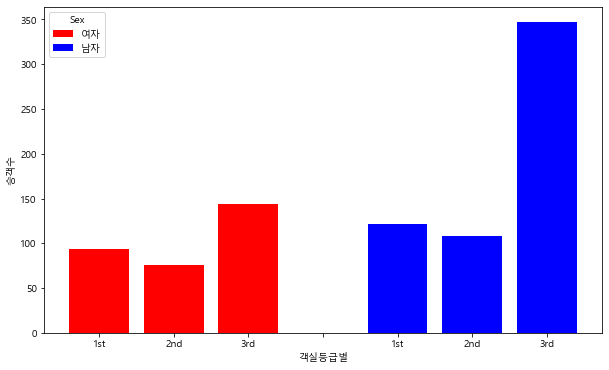

In [32]:
t1 = [1,2,3]
t2 = [5,6,7]

plt.bar(t1, count_f, color='r', label='여자')
plt.bar(t2, count_m, color='b', label='남자')
plt.xlabel('객실등급별')
plt.ylabel('승객수')
plt.legend(title='Sex')

t = list(range(1,8))
plt.xticks(t, ('1st', '2nd', '3rd','','1st','2nd','3rd'))
plt.show()

In [33]:
count_p1 = count_f[0], count_m[0]
count_p2 = count_f[1], count_m[1]
count_p3 = count_f[2], count_m[2]

count_p1, count_p2, count_p3

((94, 122), (76, 108), (144, 347))

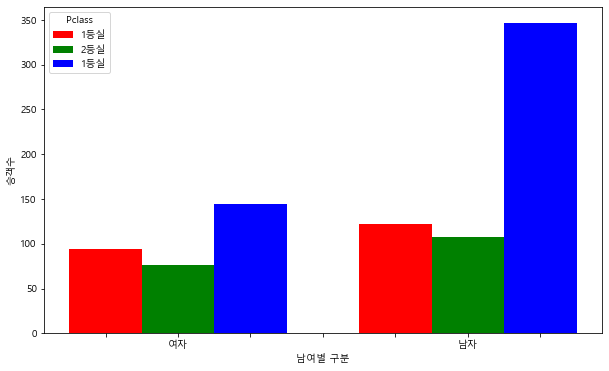

In [34]:
t1 = [1,5]
t2 = [2,6]
t3 = [3,7]

plt.figure(figsize=(10,6))
plt.bar(t1, count_p1, color='r', width=1, label='1등실')
plt.bar(t2, count_p2, color='g', width=1, label='2등실')
plt.bar(t3, count_p3, color='b', width=1, label='1등실')

plt.xlabel('남여별 구분')
plt.ylabel('승객수')
plt.legend(title='Pclass')

t = list(range(1,8))
plt.xticks(t, ('','여자','','','','남자',''))

plt.show()

In [35]:
from pandas import Series, DataFrame


In [36]:
df_tmp = DataFrame({
    'Sex' : df.Sex,
    'Pclass' : df.Pclass
})

df_tmp.head(10)

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3
5,male,3
6,male,1
7,male,3
8,female,3
9,female,2


In [37]:
len(df[df.Sex=='female'][df.Pclass==1])

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


94

In [38]:
df_tmp_f = df_tmp[df_tmp.Sex=='female']
df_tmp_f.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


In [39]:
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass==1]
df_tmp_f1.head()

,Sex,Pclass
1,female,1
3,female,1
11,female,1
31,female,1
52,female,1


In [40]:
len(df_tmp_f1)

94

In [41]:
df_tmp_f1[::10]

,Sex,Pclass
1,female,1
177,female,1
269,female,1
311,female,1
369,female,1
498,female,1
571,female,1
700,female,1
781,female,1
862,female,1


In [42]:
len(df_tmp)

891

In [43]:
df_tmp['Category'] = ""
df_tmp.head()

,Sex,Pclass,Category
0,male,3,
1,female,1,
2,female,3,
3,female,1,
4,male,3,


In [44]:
df_tmp.index

RangeIndex(start=0, stop=891, step=1)